In [3]:
import  pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
Df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
Df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
Df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [25]:
Df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [26]:
Df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
Df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [59]:
# Show a breakdown of distance from home by job role and attrition.
Df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()



Attrition,No,Yes
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


In [60]:
# Average Monthly Income
Df.MonthlyIncome.mean()

6502.931292517007

In [22]:
Df.groupby(['Education','Attrition']).MonthlyIncome.mean().unstack()

Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


Text(0, 0.5, 'DistanceFromHome')

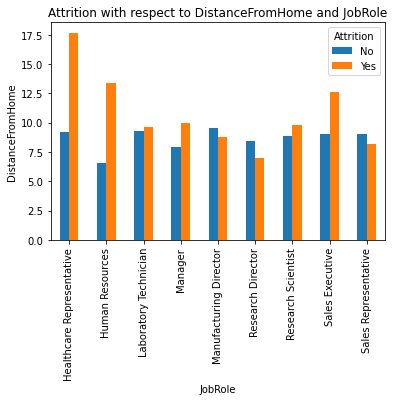

In [5]:
# Show a breakdown of distance from home by job role and attrition.
#Df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()
#visualsation
Df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack().plot(kind='bar')
plt.title('Attrition with respect to DistanceFromHome and JobRole')
plt.xlabel('JobRole')
plt.ylabel('DistanceFromHome')


In [6]:
pd.crosstab(Df.Education,Df.Attrition,values=Df.MonthlyIncome,margins=True,aggfunc='mean')

Attrition,No,Yes,All
Education,,,
1,5926.129496,4360.161290,5640.570588
2,6586.058824,4282.545455,6226.645390
3,6882.919662,4770.242424,6517.263986
4,7087.814706,5335.155172,6832.402010
5,8559.906977,5850.200000,8277.645833
All,6832.739659,4787.092827,6502.931293


Text(0, 0.5, 'Average monthly income')

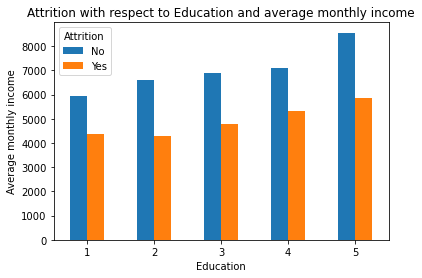

In [21]:
pd.crosstab(Df.Education,Df.Attrition,values=Df.MonthlyIncome,margins=False,aggfunc='mean').plot(kind='bar',rot=0)
plt.title('Attrition with respect to Education and average monthly income')
plt.xlabel('Education')
plt.ylabel('Average monthly income')